# Goal:The machine learning model is supposed to predict who survived during the titanic shipwreck.

In [231]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
sns.set_theme()
df = pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [234]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [235]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [236]:
#Number of missing values in Age
df['Age'].isnull().sum()

177

In [237]:
#Number of missing values in Cabin

df['Cabin'].isnull().sum()

687

In [238]:
#Number of missing values in Embarked     
df['Embarked'].isnull().sum()

2

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [240]:

df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [241]:
#Number of missing values in Age
df['Age'].isnull().sum()

0

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [243]:
#Number of missing values in Cabin
df['Cabin'].isnull().sum()

687

In [244]:
#Delete the Cabin column 
df.drop('Cabin', axis=1, inplace=True)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [246]:
#Delete the name column 
df.drop('Name', axis=1, inplace=True)

In [247]:
#Delete the Ticket column 
df.drop('Ticket', axis=1, inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [249]:
df = df.dropna()

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


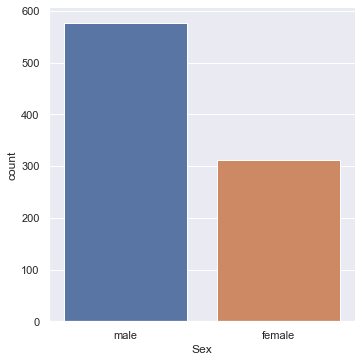

In [251]:
###Who were the passengers on the titanic? (What age, gender, class etc)

###Gender Plot
sns.factorplot('Sex',data=df,kind='count')

### Shows more male passengers than female

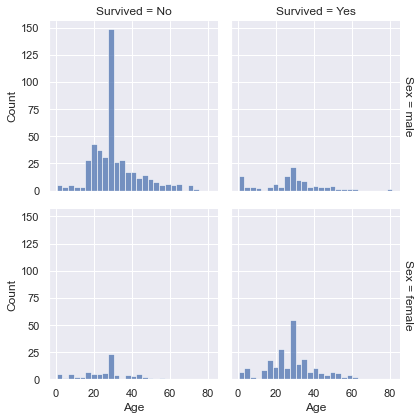

In [252]:

  ###Who were the passengers on the titanic? (What age, gender, class etc)
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="Age", col="Survived", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)  
### Shows female male passengers than male a ccording to Age 

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


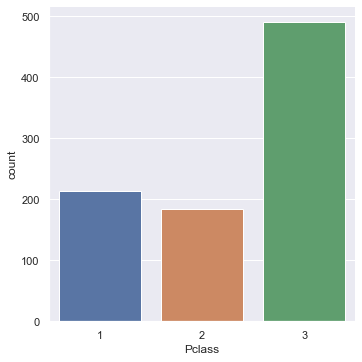

In [253]:
### Class plot
sns.factorplot('Pclass',data=df,kind='count')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


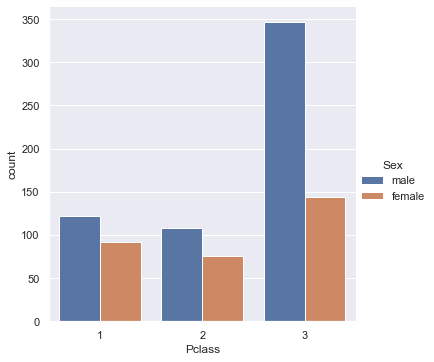

In [254]:
###Interesting! More passengers are from class Three. Now lets find the gender ration among the classes

sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

In [255]:
##This gives us an insight that there are quite a few males than females in 3rd class. Now lets dig deeper and find the children among the passengers.

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

In [256]:
df.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person
0,343,No,2,male,28.0,0,0,13.0000,S,male
1,76,No,3,male,25.0,0,0,7.6500,S,male
2,641,No,3,male,20.0,0,0,7.8542,S,male
3,568,No,3,female,29.0,0,4,21.0750,S,female
4,672,No,1,male,31.0,1,0,52.0000,S,male
5,105,No,3,male,37.0,2,0,7.9250,S,male
6,576,No,3,male,19.0,0,0,14.5000,S,male
7,382,Yes,3,female,1.0,0,2,15.7417,C,child
8,228,No,3,male,20.5,0,0,7.2500,S,male
9,433,Yes,2,female,42.0,1,0,26.0000,S,female


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


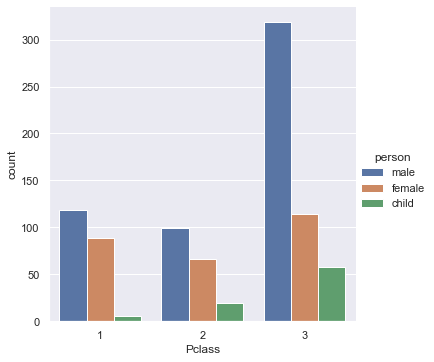

In [257]:
### Plotting a graph to check the ratio of male,female and children in each category of class

sns.factorplot('Pclass',data=df,hue='person',kind='count')

<AxesSubplot:>

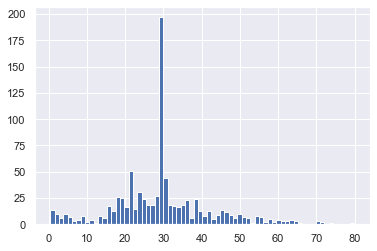

In [258]:
###Now let us look at the ages of the passengers

df['Age'].hist(bins=70)

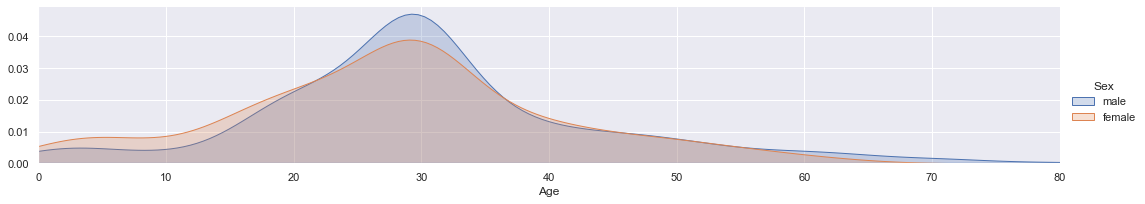

In [259]:
as_fig = sns.FacetGrid(df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

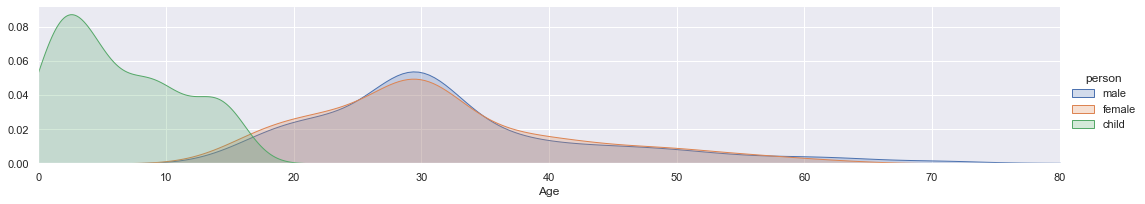

In [260]:
as_fig = sns.FacetGrid(df,hue='person',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


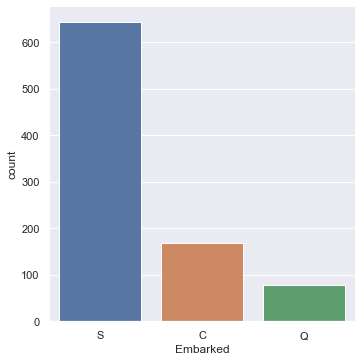

In [261]:
sns.factorplot('Embarked',data=df,kind='count')


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


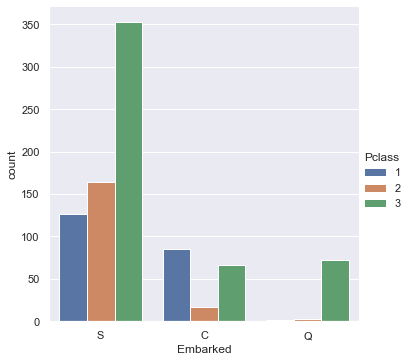

In [262]:
sns.factorplot('Embarked',data=df,hue='Pclass',kind='count')



In [263]:
## Let's check who are with family and who are alone
## This can be found by adding Parch and Sibsp columns
df['Alone'] = df.Parch + df.SibSp

In [264]:
## if Alone value is >0 then they are with family else they are Alone

df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without Family'

C:\Users\HanaA\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


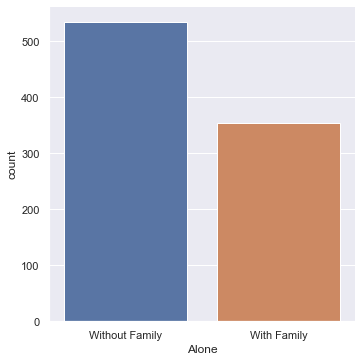

In [265]:
#Let us visualise the Alone column

sns.factorplot('Alone',kind='count',data=df)

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


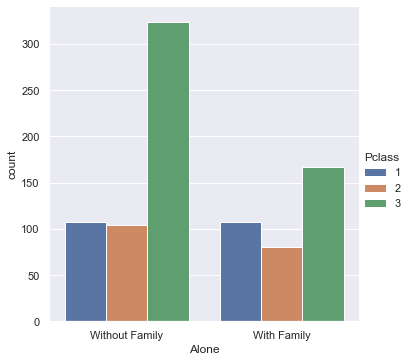

In [266]:
# let us see who are alone according to class
sns.factorplot('Alone',kind='count',data=df,hue='Pclass')

In [267]:
df["Survived"].value_counts()

No     549
Yes    340
Name: Survived, dtype: int64

In [268]:
cleanup_Survived = {"Survived":     {"No": 0, "Yes": 1}}

In [269]:
df = df.replace(cleanup_Survived)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,male,28.0,0,0,13.0000,S,male,Without Family
1,76,0,3,male,25.0,0,0,7.6500,S,male,Without Family
2,641,0,3,male,20.0,0,0,7.8542,S,male,Without Family
3,568,0,3,female,29.0,0,4,21.0750,S,female,With Family
4,672,0,1,male,31.0,1,0,52.0000,S,male,With Family


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


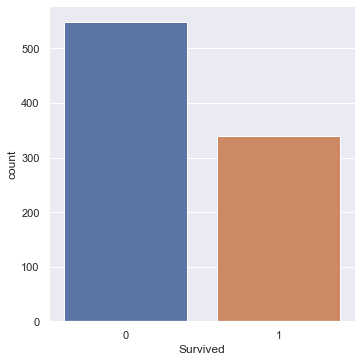

In [270]:
sns.factorplot('Survived',data=df,kind='count')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


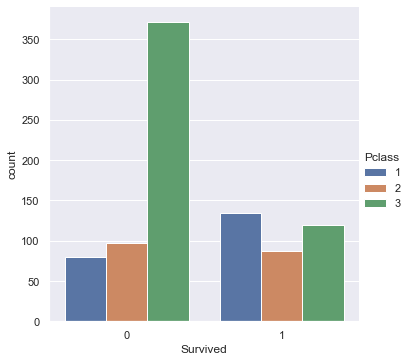

In [271]:
## checking of the class had any effect in the survival rate
sns.factorplot('Survived',data=df,kind='count',hue='Pclass')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


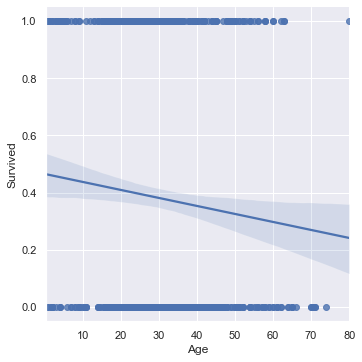

In [272]:
# Let us check how Age playes a role in the survival rate.
sns.lmplot('Age','Survived',data=df)


In [273]:
df["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [274]:
cleanup_Sex = {"Sex":     {"female": 0, "male": 1}}

In [275]:
df = df.replace(cleanup_Sex)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,1,28.0,0,0,13.0000,S,male,Without Family
1,76,0,3,1,25.0,0,0,7.6500,S,male,Without Family
2,641,0,3,1,20.0,0,0,7.8542,S,male,Without Family
3,568,0,3,0,29.0,0,4,21.0750,S,female,With Family
4,672,0,1,1,31.0,1,0,52.0000,S,male,With Family


C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


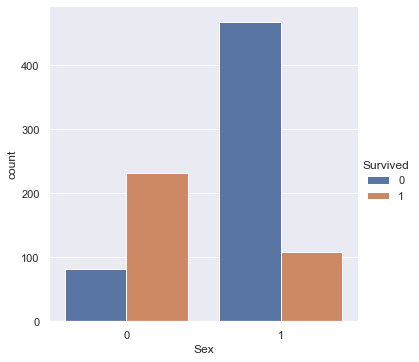

In [276]:
sns.factorplot('Sex',data=df,kind='count',hue='Survived')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


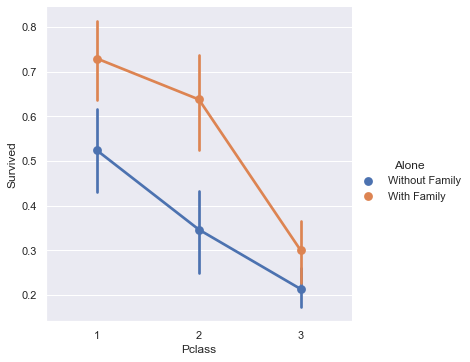

In [277]:
sns.factorplot('Pclass','Survived',data=df,hue='Alone')

C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HanaA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


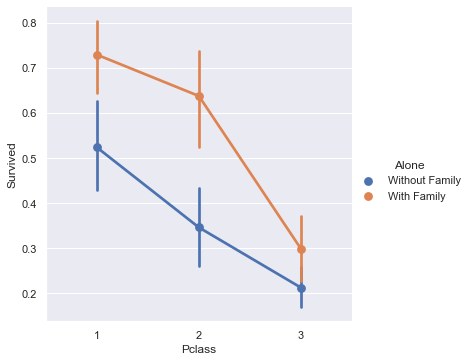

In [278]:
sns.factorplot('Pclass','Survived',data=df,hue='Alone')

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   person       889 non-null    object 
 10  Alone        889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 115.6+ KB


In [280]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [281]:
cleanup_Embarked = {"Embarked":     {"S": 1, "C": 2, "Q":3}}

In [282]:
df = df.replace(cleanup_Embarked)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,1,28.0,0,0,13.0000,1,male,Without Family
1,76,0,3,1,25.0,0,0,7.6500,1,male,Without Family
2,641,0,3,1,20.0,0,0,7.8542,1,male,Without Family
3,568,0,3,0,29.0,0,4,21.0750,1,female,With Family
4,672,0,1,1,31.0,1,0,52.0000,1,male,With Family


In [283]:
#separate independent and dependent var
x= df[['PassengerId','Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y= df['Survived']

In [284]:
x

,PassengerId,Sex,Pclass,Age,SibSp,Parch,Fare
0,343,1,2,28.000000,0,0,13.0000
1,76,1,3,25.000000,0,0,7.6500
2,641,1,3,20.000000,0,0,7.8542
3,568,0,3,29.000000,0,4,21.0750
4,672,1,1,31.000000,1,0,52.0000
...,...,...,...,...,...,...,...
886,10,0,2,14.000000,1,0,30.0708
887,61,1,3,22.000000,0,0,7.2292
888,535,0,3,30.000000,0,0,8.6625
889,102,1,3,29.699118,0,0,7.8958


In [285]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 889, dtype: int64

In [286]:
#Data Modelling using Logistic Regression
#1/Build the model

#import train test split method
from sklearn.model_selection import train_test_split


In [287]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,person,Alone
0,343,0,2,1,28.0,0,0,13.0000,1,male,Without Family
1,76,0,3,1,25.0,0,0,7.6500,1,male,Without Family
2,641,0,3,1,20.0,0,0,7.8542,1,male,Without Family
3,568,0,3,0,29.0,0,4,21.0750,1,female,With Family
4,672,0,1,1,31.0,1,0,52.0000,1,male,With Family


In [288]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [289]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression

In [290]:
#Fit  Logistic Regression 
lr=LogisticRegression()


In [291]:
lr.fit(x_train,y_train)


C:\Users\HanaA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [292]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [293]:
#predict
predict=lr.predict(x_test)


Testing
See how our model is performing

In [294]:
#print confusion matrix 
from sklearn.metrics import confusion_matrix


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

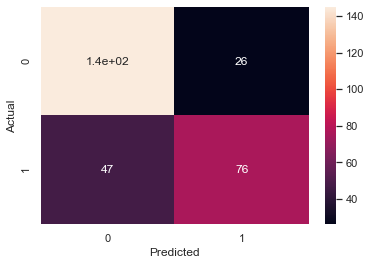

In [295]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [308]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,145,26
Actual Yes,47,76


In [318]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

PassengerId    True
Survived       True
Pclass         True
Sex            True
Age            True
SibSp          True
Parch          True
Fare           True
Embarked       True
person         True
Alone          True
dtype: bool

In [333]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [344]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_probabilities = lr.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_probabilities[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = np.zeros(len(y_test))
rand_fpr, rand_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# # auc scores
auc_score = roc_auc_score(y_test, pred_probabilities[:,1])
print(auc_score)

0.7974611325060619


In [346]:
# predict probabilities
pred_prob1 = lr.predict_proba(x_test)
pred_prob2 = lr.predict_proba(x_test)

In [347]:
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.76      0.85      0.80       171
           1       0.75      0.62      0.68       123

    accuracy                           0.75       294
   macro avg       0.75      0.73      0.74       294
weighted avg       0.75      0.75      0.75       294



In [348]:
print(accuracy_score(y_test,predict))

0.7517006802721088


In [349]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

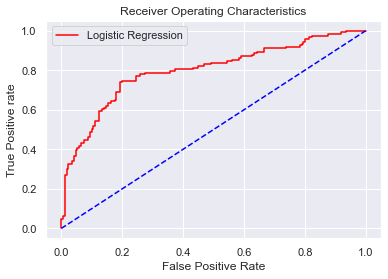

In [354]:
plt.plot(fpr, tpr, linestyle='-',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('Receiver Operating Characteristics')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()